Data Set Information:

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


Attribute Information:

Date : year-month-day 
Rented Bike count - Count of bikes rented at each hour 
Hour - Hour of he day 
Temperature-Temperature in Celsius 
Humidity - % 
Windspeed - m/s 
Visibility - 10m 
Dew point temperature - Celsius 
Solar radiation - MJ/m2 
Rainfall - mm 
Snowfall - cm 
Seasons - Winter, Spring, Summer, Autumn 
Holiday - Holiday/No holiday 
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### 1. Import and warehouse data:

In [8]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
import os
import glob
import time

In [9]:
bikedata= pd.read_csv("SeoulBikeData.csv",encoding = 'unicode_escape')
bikedata.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [10]:
bikedataorig=pd.read_csv("SeoulBikeData.csv",encoding = 'unicode_escape')

In [11]:
bikedataorig.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [13]:
print(bikedata.shape)
print(bikedata.size)

(8760, 14)
122640


In [14]:
bikedata.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [15]:
bikedata.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### 2. Data Cleansing

In [16]:
bikedata['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [17]:
bikedata['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [18]:
bikedata['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
bikedata.rename(columns = {'Functioning Day':'FunctioningDay'}, inplace = True)

In [20]:
bikedata.rename(columns = {'Snowfall (cm)':'Snowfall'}, inplace = True)

In [21]:
bikedata.rename(columns = {'Rainfall(mm)':'Rainfall'}, inplace = True)

In [22]:
bikedata['Date']=pd.to_datetime(bikedata['Date'])
bikedata['Year']=bikedata['Date'].dt.year
bikedata['Month']=bikedata['Date'].dt.month
bikedata['Day']=bikedata['Date'].dt.day
bikedata['WeekDay']=bikedata['Date'].dt.day_name()
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
bikedata['WeekDayEncoding']=bikedata['WeekDay'].map(mapping_dictDay)

In [23]:
bikedata=bikedata.drop('Date',axis=1)

In [24]:
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,Year,Month,Day,WeekDay,WeekDayEncoding
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,4


In [25]:
bikedataorig.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/17,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/17,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/17,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/17,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/17,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [26]:
for feature in bikedata.columns: # Loop through all columns in the dataframe
    if bikedata[feature].dtype == 'object': # Only apply for columns with categorical strings
        bikedata[feature] = pd.Categorical(bikedata[feature])# Replace strings with an integer
bikedata.head(10)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,Year,Month,Day,WeekDay,WeekDayEncoding
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,4
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,4
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,4
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,4
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,4
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday,4


In [27]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   int64   
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall                   8760 non-null   float64 
 9   Snowfall                   8760 non-null   float64 
 10  Seasons                    8760 non-null   category
 11  Holiday                    8760 non-null   category
 12  FunctioningDay             8760 non-null   category
 13  Year                       8760 n

In [28]:
replaceStruct = {
                "Holiday":     {"No Holiday": 0, "Holiday": 1},
                "FunctioningDay": {"No": 0, "Yes": 1}
                    }
oneHotCols=["Seasons"]

In [29]:
bikedata=bikedata.replace(replaceStruct)
bikedata=pd.get_dummies(bikedata, columns=oneHotCols)
bikedata.head(10)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall,...,FunctioningDay,Year,Month,Day,WeekDay,WeekDayEncoding,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,...,1,2017,1,12,Thursday,4,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,...,1,2017,1,12,Thursday,4,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,...,1,2017,1,12,Thursday,4,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,...,1,2017,1,12,Thursday,4,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,...,1,2017,1,12,Thursday,4,0,0,0,1
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,...,1,2017,1,12,Thursday,4,0,0,0,1
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,...,1,2017,1,12,Thursday,4,0,0,0,1
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,...,1,2017,1,12,Thursday,4,0,0,0,1
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,...,1,2017,1,12,Thursday,4,0,0,0,1
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,...,1,2017,1,12,Thursday,4,0,0,0,1


In [30]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   int64   
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall                   8760 non-null   float64 
 9   Snowfall                   8760 non-null   float64 
 10  Holiday                    8760 non-null   int64   
 11  FunctioningDay             8760 non-null   int64   
 12  Year                       8760 non-null   int64   
 13  Month                      8760 n

### 3. EDA

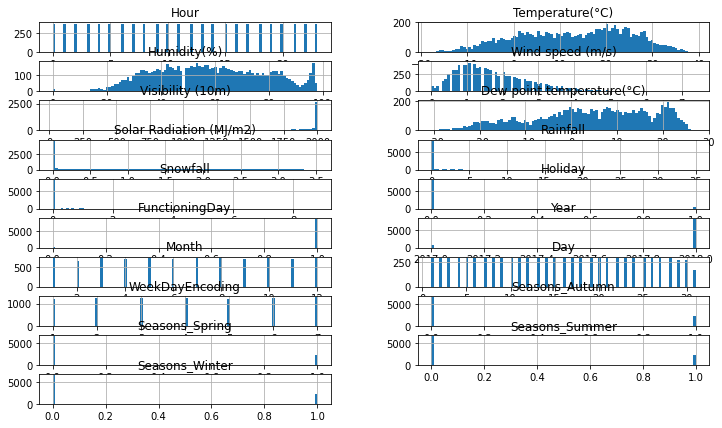

In [31]:
columns = list(bikedata)[1:] # Excluding Outcome column which has only 
bikedata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(42,2)); 
# Distribution of all columns

In [32]:
bikedata.skew(axis = 0, skipna = True)

Rented Bike Count             1.153428
Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall                     14.533232
Snowfall                      8.440801
Holiday                       4.163603
FunctioningDay               -5.170969
Year                         -2.978262
Month                        -0.010458
Day                           0.007522
WeekDayEncoding               0.000688
Seasons_Autumn                1.159123
Seasons_Spring                1.142294
Seasons_Summer                1.142294
Seasons_Winter                1.176139
dtype: float64

In [33]:
bikedataorig.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [34]:
def plot_corr(bikedataorig, size=26):
    corr = bikedataorig.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

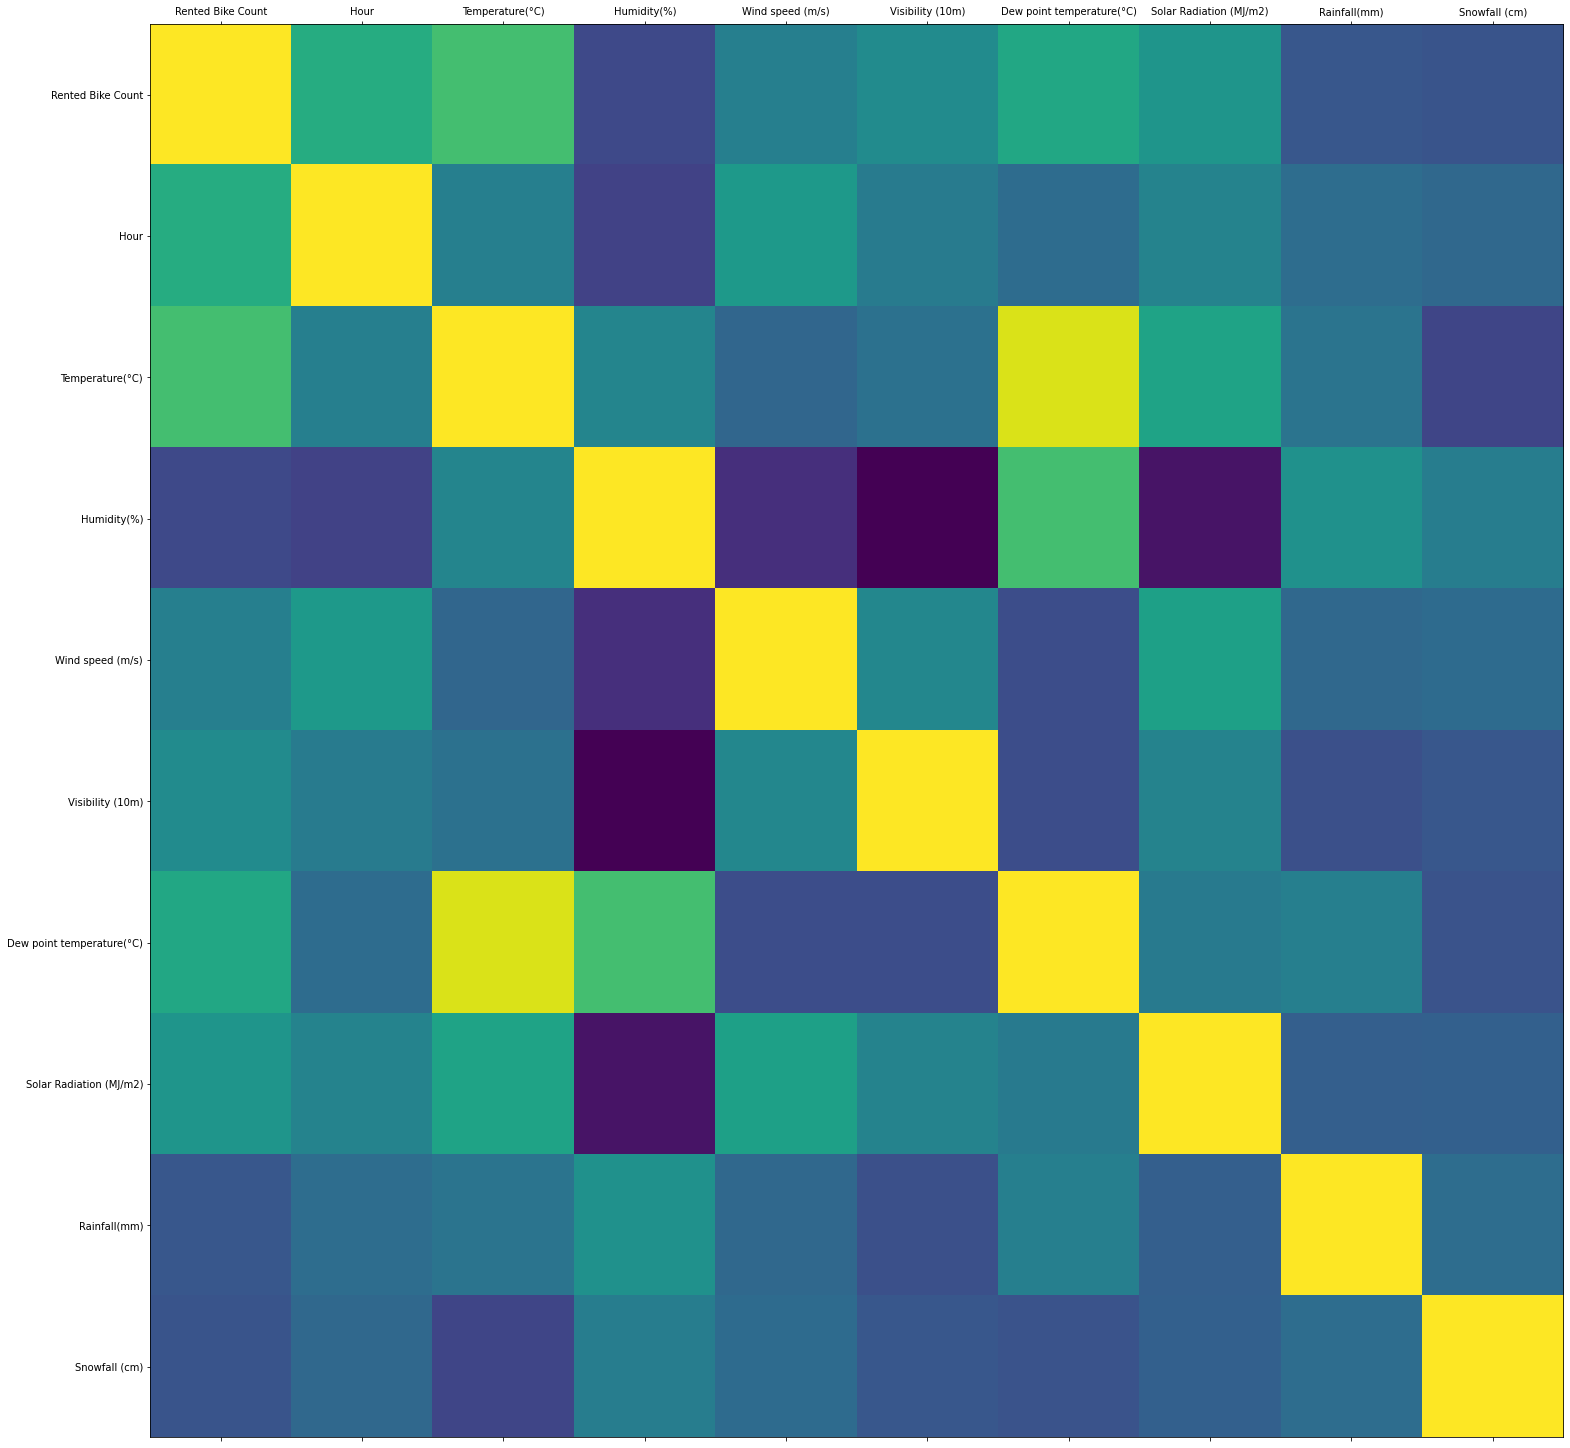

In [35]:
plot_corr(bikedataorig)

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

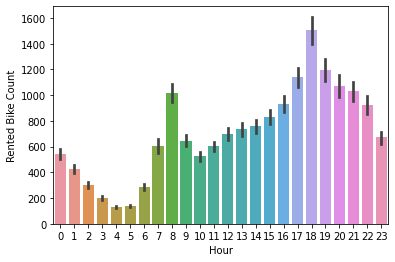

In [36]:
sns.barplot(data=bikedata, x="Hour", y="Rented Bike Count")

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

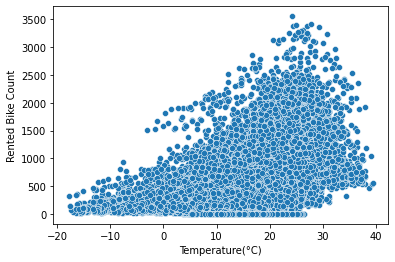

In [37]:
sns.scatterplot(data=bikedata, x="Temperature(°C)", y="Rented Bike Count")

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)', ylabel='Rented Bike Count'>

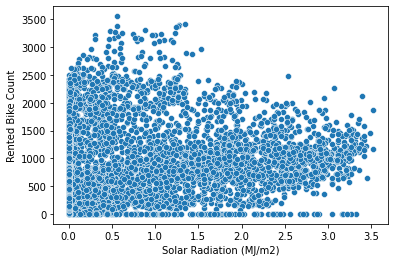

In [38]:
sns.scatterplot(data=bikedata, x="Solar Radiation (MJ/m2)", y="Rented Bike Count")

<AxesSubplot:xlabel='Visibility (10m)', ylabel='Rented Bike Count'>

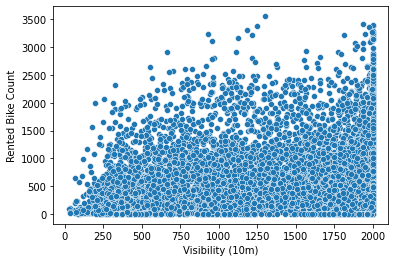

In [39]:
sns.scatterplot(data=bikedata, x="Visibility (10m)", y="Rented Bike Count")

In [40]:
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall,...,FunctioningDay,Year,Month,Day,WeekDay,WeekDayEncoding,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,...,1,2017,1,12,Thursday,4,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,...,1,2017,1,12,Thursday,4,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,...,1,2017,1,12,Thursday,4,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,...,1,2017,1,12,Thursday,4,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,...,1,2017,1,12,Thursday,4,0,0,0,1


In [41]:
sns.pairplot(bikedata,diag_kind='kde')

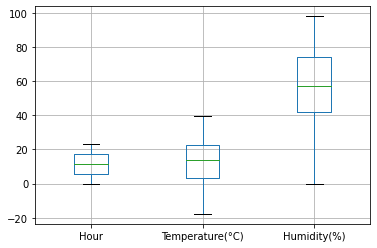

In [42]:
np.random.seed(1234)
boxplot = bikedata.boxplot(column=['Hour', 'Temperature(°C)', 'Humidity(%)'])

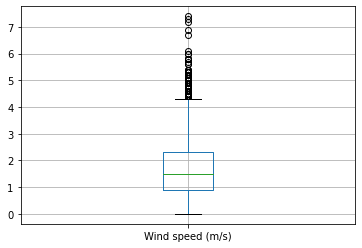

In [43]:
boxplot1=bikedata.boxplot(column=['Wind speed (m/s)'])

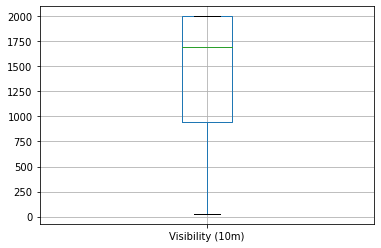

In [44]:
boxplot2=bikedata.boxplot(column=['Visibility (10m)'])

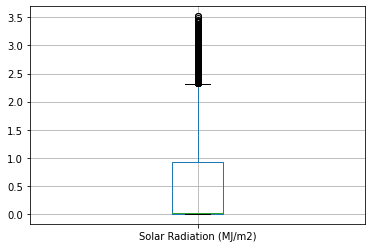

In [45]:
boxplot3=bikedata.boxplot(column=['Solar Radiation (MJ/m2)'])

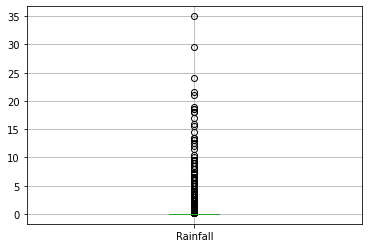

In [46]:
boxplot4=bikedata.boxplot(column=['Rainfall'])

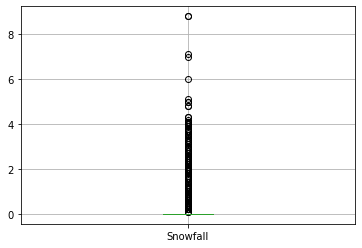

In [47]:
boxplot5=bikedata.boxplot(column=['Snowfall'])

In [48]:
oneHotCols=["Hour"]

In [49]:
bikedata=pd.get_dummies(bikedata, columns=oneHotCols)
bikedata.head(10)

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,254,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5,100,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
6,181,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
7,460,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
8,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
9,490,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Temperature(°C)            8760 non-null   float64 
 2   Humidity(%)                8760 non-null   int64   
 3   Wind speed (m/s)           8760 non-null   float64 
 4   Visibility (10m)           8760 non-null   int64   
 5   Dew point temperature(°C)  8760 non-null   float64 
 6   Solar Radiation (MJ/m2)    8760 non-null   float64 
 7   Rainfall                   8760 non-null   float64 
 8   Snowfall                   8760 non-null   float64 
 9   Holiday                    8760 non-null   int64   
 10  FunctioningDay             8760 non-null   int64   
 11  Year                       8760 non-null   int64   
 12  Month                      8760 non-null   int64   
 13  Day                        8760 n

In [51]:
bikedata=bikedata.drop('Dew point temperature(°C)',axis=1)
bikedata=bikedata.drop('WeekDay',axis=1)
bikedata=bikedata.drop('Hour_0',axis=1)
bikedata=bikedata.drop('Seasons_Autumn',axis=1)
#Dropping since dew point and temperature are highly correlated

In [52]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   int64  
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   int64  
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall                 8760 non-null   float64
 7   Snowfall                 8760 non-null   float64
 8   Holiday                  8760 non-null   int64  
 9   FunctioningDay           8760 non-null   int64  
 10  Year                     8760 non-null   int64  
 11  Month                    8760 non-null   int64  
 12  Day                      8760 non-null   int64  
 13  WeekDayEncoding          8760 non-null   int64  
 14  Seasons_Spring          

In [53]:
bikedata.isnull().sum()

Rented Bike Count          0
Temperature(°C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall                   0
Snowfall                   0
Holiday                    0
FunctioningDay             0
Year                       0
Month                      0
Day                        0
WeekDayEncoding            0
Seasons_Spring             0
Seasons_Summer             0
Seasons_Winter             0
Hour_1                     0
Hour_2                     0
Hour_3                     0
Hour_4                     0
Hour_5                     0
Hour_6                     0
Hour_7                     0
Hour_8                     0
Hour_9                     0
Hour_10                    0
Hour_11                    0
Hour_12                    0
Hour_13                    0
Hour_14                    0
Hour_15                    0
Hour_16                    0
Hour_17                    0
Hour_18       

## Split Data & Scaling

In [54]:
X = bikedata.drop("Rented Bike Count", axis=1)
y = bikedata['Rented Bike Count']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [56]:
X_train.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,Year,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
1444,-11.1,50,1.2,1986,0.00,0.0,0.0,0,1,2018,...,0,0,0,0,0,0,0,0,0,0
1652,-5.8,44,2.1,1994,0.00,0.0,0.0,0,1,2018,...,0,0,0,0,0,0,1,0,0,0
7496,11.4,66,0.8,1991,0.18,0.0,0.0,1,0,2018,...,0,0,0,0,0,0,0,0,0,0
1893,-2.3,38,2.3,2000,0.00,0.0,0.0,1,1,2018,...,0,0,0,0,0,0,0,1,0,0
3880,19.1,54,3.2,542,0.94,0.0,0.0,0,1,2018,...,0,0,1,0,0,0,0,0,0,0


In [57]:
y_train.head()

1444      33
1652     218
7496       0
1893     133
3880    1496
Name: Rented Bike Count, dtype: int64

In [58]:
y_train=np.array(y_train)

In [59]:
y_test=np.array(y_test)

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain_transform=sc.fit_transform(X_train)

In [61]:
Xtest_transform=sc.fit_transform(X_test)

### Modelling

In [62]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(Xtrain_transform, y_train)

LinearRegression()

In [63]:
regression_model.intercept_, regression_model.coef_

(706.6350293542026,
 array([ 268.75284178, -133.00281811,    1.42285139,    3.36253629,
          67.79879612,  -72.27642071,    7.14031839,  -29.28815799,
         174.88747387,  -28.98562757,   -0.67108177,  -12.76942973,
         -11.91813357,  -77.56645927,  -65.48691839, -177.93937101,
         -18.7516627 ,  -42.83584335,  -56.10653874,  -68.8896315 ,
         -67.11868622,  -36.78966947,   23.26004009,   87.08515714,
           6.73319639,  -41.5731966 ,  -43.89510564,  -39.3031801 ,
         -36.70870371,  -37.71602885,  -20.5666695 ,   10.41850907,
          63.55629866,  151.95505891,  108.42504559,   90.44776213,
          88.59185109,   67.04259182,   22.7450146 ]))

In [64]:
regression_model.score(Xtrain_transform, y_train)

0.664218554961344

In [65]:
regression_model.score(Xtest_transform, y_test)

0.6589781894674902

In [66]:
print('Variance score: %.3f' % regression_model.score(Xtest_transform, y_test)) # Also the r^2

Variance score: 0.659


In [67]:
y_pred=regression_model.predict(Xtest_transform)

In [68]:
print('R^2: %.3f' % r2_score(y_test, y_pred))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.659
Mean Absolute Error: 282.369
Mean Squared Error: 139747.364
Root Mean Squared Error: 373.828


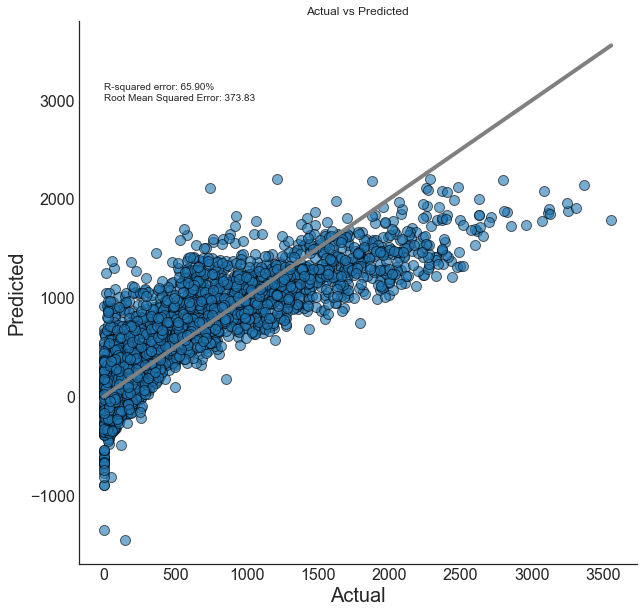

In [69]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=10,10 
#plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_test,
                y=y_pred,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(regression_model.score(Xtest_transform,y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(metrics.mean_squared_error(y_test,y_pred,squared=False))),
             xy=(0,3000),
             size='medium')
sns.despine()

## Implementing Gradient Descent

In [70]:
def batch_gradient_descent(x,y, epoch, learning_rate,ep):

    number_of_variables = x.shape[1]
    converged = False
    coef = 0
    beta = np.ones(shape=(number_of_variables))
    y_predicted = np.dot(beta, x.T) + coef

    costinit = np.inf
    sample_size = x.shape[0]

    cost_list = []
    epoch_list = []
    stepsize_beta_list=[]
    stepsize_coef_list=[]
    i=0
    while not converged:
 #       print(i)
        y_predicted = np.dot(beta, x.T) + coef
        beta_grad = -(1/sample_size)*(x.T.dot(y-y_predicted))
        coef_grad = -(1/sample_size)*np.sum(y-y_predicted)

        stepsize_beta = beta - learning_rate*beta_grad
        stepsize_coef = coef - learning_rate*coef_grad
       # print(stepsize_beta,stepsize_coef)

        beta = stepsize_beta
        coef = stepsize_coef       
        
        cost = (1/2)*np.mean(np.square(y-y_predicted))
        cost_list.append(cost)
        #print(cost_list,cost)
        epoch_list.append(i)
        if (costinit < cost):
            print('alpha is high decrease alpha its not converging',costinit,cost,i)
            converged = True
        if (abs(costinit-cost) <= ep):
            print ('Converged, iterations: ', i,costinit,cost,cost_list[i-1],cost_list[i],abs(costinit-cost), '!!!')
            converged = True
    
        costinit = cost  # update error 
        i += 1  # update iter
    
        if i == epoch:
            print ('Max interactions exceeded!',cost)
            converged = True
    return beta,coef,cost_list,epoch_list



In [71]:
beta,coef,cost_list,epoch_list=batch_gradient_descent(Xtrain_transform,y_train,100000,0.8,1e-3)
beta,coef

alpha is high decrease alpha its not converging 175344.63577806522 203319.64472215867 2


(array([ 366.87273172, -145.17070674,   53.00737649,   94.58291408,
         206.73522144,  -84.62247752,  -79.16567681,  -49.00977052,
         138.20156257,  129.98767454,   24.18573958,    7.98632907,
          -9.04414864,   16.02473518,  139.60748212, -290.7645464 ,
         -53.06819628,  -81.64768862,  -97.53166715, -114.32993951,
        -112.19421982,  -83.21524362,  -23.56006573,   50.99733343,
          -3.88305039,  -25.50049493,  -13.96025487,    7.46704242,
          15.47961051,   18.33406298,   30.64364152,   54.65259383,
          86.25113275,  155.05944702,   97.67401478,   71.34796087,
          64.8926644 ,   40.13570297,   -5.51783535]),
 700.9819491193662)

## Experiment 1

In [72]:
start1=time.time()
beta1,coef1,cost_list1,epoch_list1=batch_gradient_descent(Xtrain_transform,y_train,100000,0.1,1e-3)
end1=time.time()
time1=end1-start1
beta1,coef1,time1

Converged, iterations:  540 70280.99807195479 70280.99707465169 70280.99807195479 70280.99707465169 0.0009973030973924324 !!!


(array([ 268.58251882, -132.97789089,    1.41850098,    3.33065579,
          68.16623035,  -72.25381786,    7.14398302,  -29.28728138,
         174.89566201,  -29.0309623 ,   -0.70008353,  -12.77595471,
         -11.92004156,  -77.63753904,  -65.47222819, -178.04807925,
         -19.22084516,  -43.30949002,  -56.57697328,  -69.37119337,
         -67.59478615,  -37.27020732,   22.77292495,   86.57843162,
           6.1849858 ,  -42.14515852,  -44.49828271,  -39.93351894,
         -37.33287413,  -38.32587861,  -21.15695415,    9.85478198,
          63.05223575,  151.4603441 ,  107.94610847,   89.98864058,
          88.1285198 ,   66.58712115,   22.27518098]),
 706.6350293542022,
 0.18181419372558594)

In [73]:
start2=time.time()
beta2,coef2,cost_list2,epoch_list2=batch_gradient_descent(Xtrain_transform,y_train,100000,0.01,1e-3)
end2=time.time()
time2=end2-start2
beta2,coef2,time2

Converged, iterations:  3242 70281.73272881625 70281.73172953684 70281.73272881625 70281.73172953684 0.0009992794075515121 !!!


(array([ 267.26231683, -132.58339067,    1.27019235,    3.44774617,
          69.10498376,  -72.26532276,    7.07649945,  -29.22994687,
         174.82036637,  -29.05530684,   -0.73224841,  -12.68610236,
         -11.92680034,  -77.59776284,  -64.84837516, -178.54483763,
         -19.83828686,  -43.94646418,  -57.2225521 ,  -70.04175225,
         -68.26707147,  -37.94770548,   22.07665827,   85.85405994,
           5.41844825,  -42.93686826,  -45.31857835,  -40.77406674,
         -38.15964721,  -39.09744565,  -21.87006905,    9.20829615,
          62.51137707,  150.93371113,  107.42644822,   89.47252325,
          87.57968544,   66.03432246,   21.68376423]),
 706.6350293541971,
 0.7166337966918945)

In [74]:
start3=time.time()
beta3,coef3,cost_list3,epoch_list3=batch_gradient_descent(Xtrain_transform,y_train,100000,0.001,1e-3)
end3=time.time()
time3=end3-start3
beta3,coef3,time3

Converged, iterations:  22583 70285.2190006101 70285.21800071266 70285.2190006101 70285.21800071266 0.000999897441943176 !!!


(array([ 2.64073638e+02, -1.31274411e+02,  7.08805902e-01,  4.15187584e+00,
         7.02622426e+01, -7.24181917e+01,  6.83418333e+00, -2.90181895e+01,
         1.74392368e+02, -2.84557209e+01, -2.48167456e-01, -1.22290493e+01,
        -1.19214938e+01, -7.64378201e+01, -6.25213917e+01, -1.78594679e+02,
        -2.05023655e+01, -4.46635982e+01, -5.79748806e+01, -7.08321253e+01,
        -6.90926362e+01, -3.87682839e+01,  2.12351191e+01,  8.50460180e+01,
         4.68100583e+00, -4.35957739e+01, -4.59042631e+01, -4.12968964e+01,
        -3.86531827e+01, -3.94735148e+01, -2.21752164e+01,  8.97918292e+00,
         6.23449169e+01,  1.50706988e+02,  1.07128815e+02,  8.90996523e+01,
         8.71106439e+01,  6.55345980e+01,  2.10981526e+01]),
 706.6350292455143,
 4.952147006988525)

In [75]:
start4=time.time()
beta4,coef4,cost_list4,epoch_list4=batch_gradient_descent(Xtrain_transform,y_train,100000,0.0001,1e-3)
end4=time.time()
time4=end4-start4
beta4,coef4,time4

Max interactions exceeded! 70482.10134352828


(array([ 243.03361615, -120.9649471 ,   -4.02766637,   11.3588992 ,
          70.01099856,  -74.17118785,    4.77317359,  -27.08556786,
         169.71141463,  -19.85957743,    7.09816262,   -7.5008555 ,
         -11.70206274,  -61.00512174,  -40.87266439, -170.74845565,
         -24.20822351,  -48.77648213,  -62.36774759,  -75.40617679,
         -74.0560595 ,  -43.59660795,   16.46243871,   81.21947035,
           2.37939892,  -44.31834415,  -45.21751358,  -39.51275438,
         -36.65944108,  -36.79871984,  -19.624582  ,   11.38643363,
          64.02144186,  151.12520862,  106.43942238,   87.48581316,
          84.75502764,   62.9913337 ,   17.91091786]),
 706.6029642111502,
 22.26098608970642)

In [76]:
start5 = time.time()
beta5,coef5,cost_list5,epoch_list5=batch_gradient_descent(Xtrain_transform,y_train,100000,0.00001,1e-3)
end5=time.time()
time5=end5-start5
beta2,coef2,time5

Max interactions exceeded! 118863.89606956787


(array([ 267.26231683, -132.58339067,    1.27019235,    3.44774617,
          69.10498376,  -72.26532276,    7.07649945,  -29.22994687,
         174.82036637,  -29.05530684,   -0.73224841,  -12.68610236,
         -11.92680034,  -77.59776284,  -64.84837516, -178.54483763,
         -19.83828686,  -43.94646418,  -57.2225521 ,  -70.04175225,
         -68.26707147,  -37.94770548,   22.07665827,   85.85405994,
           5.41844825,  -42.93686826,  -45.31857835,  -40.77406674,
         -38.15964721,  -39.09744565,  -21.87006905,    9.20829615,
          62.51137707,  150.93371113,  107.42644822,   89.47252325,
          87.57968544,   66.03432246,   21.68376423]),
 706.6350293541971,
 20.773703813552856)

In [77]:
beta11,coef11,cost_list11,epoch_list11=batch_gradient_descent(Xtest_transform,y_test,100000,0.1,1e-3)
beta11,coef11

Converged, iterations:  413 68060.77025432796 68060.76925846138 68060.77025432796 68060.76925846138 0.0009958665759768337 !!!


(array([ 288.26577818, -137.33926442,   -0.33367845,    3.04299766,
          62.51903097,  -58.61011313,   15.57552674,  -21.98735453,
         153.63809392,  -30.06229847,   -3.38609977,   -7.09502537,
         -23.22422805,  -60.12926454,  -71.38712566, -168.60208164,
         -26.02407121,  -40.18927078,  -64.26054036,  -75.71429908,
         -70.79184708,  -33.60759177,   27.75648106,  116.06025421,
          -2.64924547,  -45.31958796,  -49.94424539,  -36.29320649,
         -45.83989128,  -40.51237291,  -24.88498008,   -8.16964602,
          51.62607116,  146.35472098,   79.7294442 ,   78.58784201,
          77.51021525,   65.6076877 ,   16.51790582]),
 699.8584474885843)

In [78]:
beta22,coef22,cost_list22,epoch_list22=batch_gradient_descent(Xtest_transform,y_test,100000,0.01,1e-3)
beta22,coef22

Converged, iterations:  3130 68061.1511546478 68061.15015635158 68061.1511546478 68061.15015635158 0.0009982962219510227 !!!


(array([ 286.87600897, -136.86610784,   -0.51483284,    3.26111045,
          63.06806671,  -58.6466256 ,   15.48439931,  -21.94079577,
         153.54674485,  -30.07055614,   -3.42689904,   -6.95765803,
         -23.22059374,  -60.02697166,  -70.71097577, -169.1443695 ,
         -26.07157972,  -40.24391916,  -64.31730555,  -75.76587347,
         -70.86593903,  -33.70673431,   27.67660337,  115.97701417,
          -2.73185838,  -45.39964795,  -50.00997001,  -36.35785639,
         -45.82429612,  -40.48384182,  -24.81196909,   -8.05809197,
          51.74844916,  146.49500434,   79.85627994,   78.6973213 ,
          77.59038821,   65.63180208,   16.52836691]),
 699.8584474885693)

In [79]:
beta33,coef33,cost_list33,epoch_list33=batch_gradient_descent(Xtest_transform,y_test,100000,0.001,1e-3)
beta33,coef33

Converged, iterations:  23076 68064.2655236862 68064.26452370324 68064.2655236862 68064.26452370324 0.0009999829635489732 !!!


(array([ 283.53329675, -135.39706563,   -1.0500386 ,    4.07473178,
          64.04690882,  -58.80689884,   15.20257357,  -21.78811017,
         153.2076821 ,  -29.58368364,   -3.08546646,   -6.44531194,
         -23.21071121,  -59.08788465,  -68.59648775, -169.54654243,
         -26.3173138 ,  -40.49056373,  -64.56727656,  -76.00675018,
         -71.14588972,  -34.05797791,   27.39889538,  115.7013138 ,
          -2.93021583,  -45.5415214 ,  -50.06930571,  -36.39080445,
         -45.61050788,  -40.27051251,  -24.48693908,   -7.70886133,
          52.09550344,  146.82707592,   80.09801419,   78.88961167,
          77.70580499,   65.57753433,   16.45449269]),
 699.8584474228518)

In [80]:
beta44,coef44,cost_list44,epoch_list44=batch_gradient_descent(Xtest_transform,y_test,100000,0.0001,1e-3)
beta44,coef44

Max interactions exceeded! 68285.19873469815


(array([ 257.92028933, -122.23492128,   -5.68357866,   12.80360262,
          64.70038395,  -60.87460552,   12.59858495,  -20.09024938,
         149.21769393,  -20.43581565,    4.28142109,   -0.67404539,
         -23.09493595,  -44.16437754,  -46.18490358, -163.75764428,
         -29.9650475 ,  -43.96266319,  -68.00322705,  -79.40842932,
         -74.6534476 ,  -38.23046718,   24.08184019,  112.67553862,
          -4.27067372,  -45.604592  ,  -48.81623636,  -34.63889509,
         -41.34758512,  -36.55540373,  -20.00319672,   -4.06160972,
          55.10543612,  148.82308934,   80.74076003,   79.02569383,
          77.26520585,   63.44842301,   14.44603907]),
 699.8266898480748)

In [81]:
beta55,coef55,cost_list55,epoch_list55=batch_gradient_descent(Xtest_transform,y_test,100000,0.00001,1e-3)
beta55,coef55

Max interactions exceeded! 115456.62469332285


(array([ 1.43520921e+02, -5.77415839e+01,  1.56216094e+01,  4.33032270e+01,
         4.73960490e+01, -4.45588165e+01, -1.64897733e+01, -1.55307456e+01,
         8.47330986e+01,  3.25251764e+01,  2.48073202e+01,  1.86144984e+01,
        -1.44482523e+01,  8.00085103e+00,  5.26422963e+01, -1.07328702e+02,
        -3.02966009e+01, -3.96817091e+01, -5.32610969e+01, -6.16418457e+01,
        -5.95907972e+01, -3.72935979e+01,  7.35029222e+00,  6.62288655e+01,
        -7.06400384e+00, -2.83710680e+01, -2.29260487e+01, -1.22715886e+01,
        -1.04893779e+01, -7.93337011e+00, -3.67301272e-02,  7.72056581e+00,
         4.50180512e+01,  1.01508736e+02,  5.01951030e+01,  5.06442244e+01,
         4.58767969e+01,  3.41446185e+01,  1.60569331e+00]),
 442.3962002504085)

## Learning Rate Plot

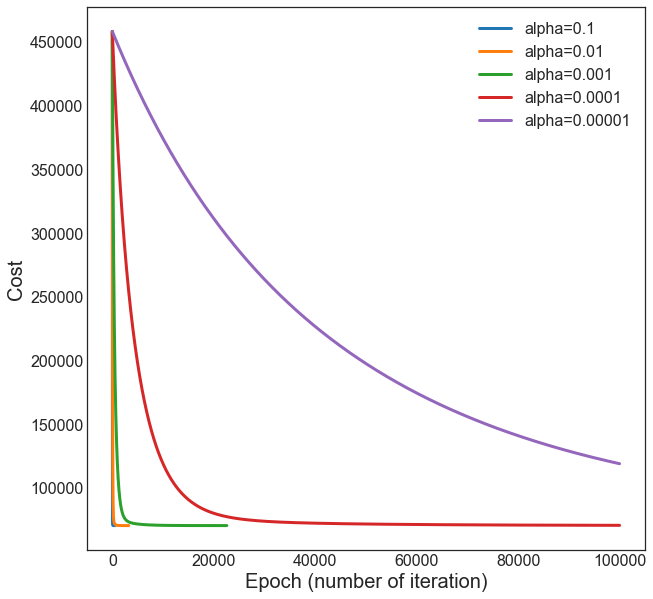

In [82]:
plt.plot(cost_list1,label="alpha=0.1")
plt.plot(cost_list2,label="alpha=0.01")
plt.plot(cost_list3,label="alpha=0.001")
plt.plot(cost_list4,label="alpha=0.0001")
plt.plot(cost_list5,label="alpha=0.00001")
plt.legend(loc="upper right")
plt.xlabel("Epoch (number of iteration)")
plt.ylabel( "Cost")
plt.show()

## Time Complexity Plot

In [83]:
alphas=[1e-5,1e-4,1e-3,1e-2,1e-1]
times=[time5,time4,time3,time2,time1]

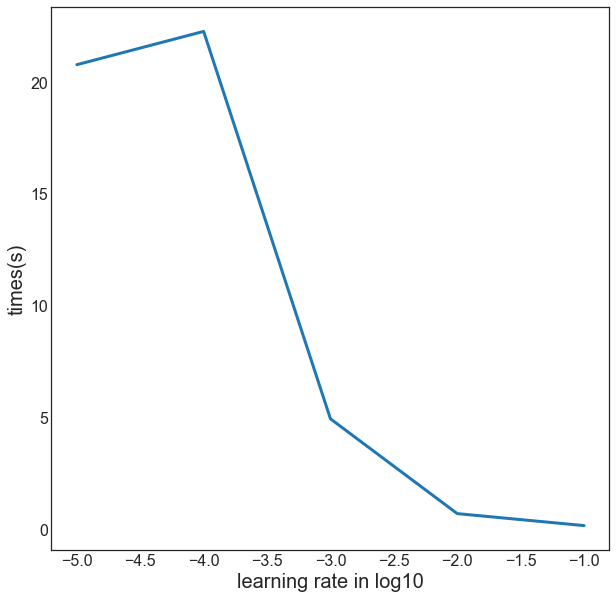

In [84]:
plt.plot(np.log10(alphas),times)
plt.xlabel("learning rate in log10")
plt.ylabel( "times(s)")
plt.show()

## Train & Test Errors against learning rate

In [85]:
alphas=[1e-5,1e-4,1e-3,1e-2,1e-1]
cost_train=[cost_list5[-1],cost_list4[-1],cost_list3[-1],cost_list2[-1],cost_list1[-1]]
cost_test=[cost_list55[-1],cost_list44[-1],cost_list33[-1],cost_list22[-1],cost_list11[-1]]

In [86]:
cost_train,cost_test

([118863.89606956787,
  70482.10134352828,
  70285.21800071266,
  70281.73172953684,
  70280.99707465169],
 [115456.62469332285,
  68285.19873469815,
  68064.26452370324,
  68061.15015635158,
  68060.76925846138])

Text(0, 0.5, 'cost')

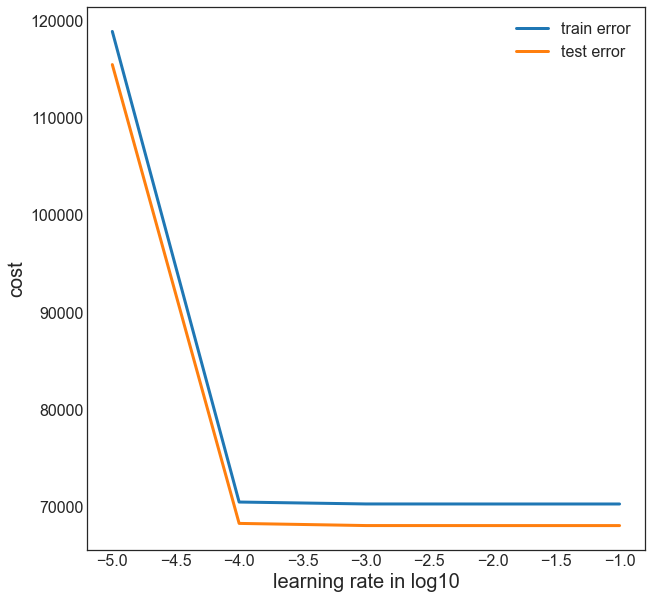

In [87]:
plt.plot(np.log10(alphas), cost_train,label="train error")
plt.plot(np.log10(alphas), cost_test,label="test error")
plt.legend(loc="upper right")
plt.xlabel("learning rate in log10")
plt.ylabel("cost")

## Experiment 2

In [88]:
beta111,coef111,cost_list111,epoch_list111=batch_gradient_descent(Xtrain_transform,y_train,100000,0.1,1000)
beta111,coef111
beta112,coef112,cost_list112,epoch_list112=batch_gradient_descent(Xtest_transform,y_test,100000,0.1,1000)
beta112,coef112

Converged, iterations:  22 77772.8317992115 76911.59329927686 77772.8317992115 76911.59329927686 861.2384999346395 !!!
Converged, iterations:  22 75480.06976595648 74646.56919317474 75480.06976595648 74646.56919317474 833.5005727817334 !!!


(array([ 184.32164664,  -82.34914488,    1.97313201,   40.0091632 ,
          49.5599119 ,  -62.40946375,   -2.25465673,  -17.33422055,
         124.94248981,   15.80990791,   28.44603546,   19.26754574,
         -20.32146645,    1.96534459,   30.01003789, -132.50244473,
         -37.96951472,  -50.52823693,  -71.22408253,  -82.68890583,
         -78.19937028,  -46.29213142,   13.9496642 ,   96.13758084,
          -7.29902227,  -40.37070041,  -38.34361821,  -23.85576806,
         -24.04568895,  -20.91959408,   -6.75371626,    4.94055906,
          57.32977629,  139.46468893,   71.61492621,   71.13152478,
          67.25043928,   50.85066481,    6.38130108]),
 637.8304263625105)

In [89]:
beta121,coef121,cost_list121,epoch_list121=batch_gradient_descent(Xtrain_transform,y_train,100000,0.1,100)
beta121,coef121
beta122,coef122,cost_list122,epoch_list122=batch_gradient_descent(Xtest_transform,y_test,100000,0.1,100)
beta122,coef122

Converged, iterations:  38 72377.08777034162 72277.20655042215 72377.08777034162 72277.20655042215 99.88121991946537 !!!
Converged, iterations:  38 70240.46662065372 70141.28844127295 70240.46662065372 70141.28844127295 99.17817938077496 !!!


(array([ 210.1433853 ,  -97.08214915,   -6.47513917,   30.65458918,
          55.36294069,  -64.81092373,    5.66988125,  -17.38418013,
         138.47398535,    2.12569691,   22.0495968 ,   12.78525982,
         -22.17658025,  -10.83815584,    3.18441792, -145.07453555,
         -37.24349131,  -50.5417223 ,  -73.69663871,  -85.33676415,
         -80.42168478,  -45.74328877,   17.44860704,  105.35666675,
          -6.20786022,  -43.64506202,  -43.73140676,  -28.62506537,
         -30.80189193,  -27.41459105,  -10.87769242,    2.31232882,
          58.84268677,  148.35626046,   78.18599025,   76.40570004,
          73.58966371,   56.93742703,    9.27540313]),
 688.36452994647)

In [90]:
beta131,coef131,cost_list131,epoch_list131=batch_gradient_descent(Xtrain_transform,y_train,100000,0.1,10)
beta131,coef131
beta132,coef132,cost_list132,epoch_list132=batch_gradient_descent(Xtest_transform,y_test,100000,0.1,10)
beta132,coef132

Converged, iterations:  91 70558.95732903022 70549.2014859954 70558.95732903022 70549.2014859954 9.755843034814461 !!!
Converged, iterations:  93 68348.13383371662 68338.30473840254 68348.13383371662 68338.30473840254 9.829095314082224 !!!


(array([ 2.55448945e+02, -1.20948179e+02, -6.11705301e+00,  1.36982953e+01,
         6.45115364e+01, -6.10997915e+01,  1.23389850e+01, -1.99096478e+01,
         1.48792810e+02, -1.94013056e+01,  5.12937220e+00, -6.57517673e-02,
        -2.30804004e+01, -4.25040628e+01, -4.38272598e+01, -1.62968761e+02,
        -3.03697738e+01, -4.43446083e+01, -6.83788877e+01, -7.97826832e+01,
        -7.50308737e+01, -3.86752475e+01,  2.37269294e+01,  1.12358437e+02,
        -4.39032699e+00, -4.55730914e+01, -4.86369197e+01, -3.44023021e+01,
        -4.08533649e+01, -3.61329565e+01, -1.95130569e+01, -3.68642602e+00,
         5.53958037e+01,  1.48986389e+02,  8.07566234e+01,  7.89893611e+01,
         7.71765739e+01,  6.31862302e+01,  1.42062695e+01]),
 699.8234685927362)

In [91]:
beta141,coef141,cost_list141,epoch_list141=batch_gradient_descent(Xtrain_transform,y_train,100000,0.1,1)
beta141,coef141
beta142,coef142,cost_list142,epoch_list142=batch_gradient_descent(Xtest_transform,y_test,100000,0.1,1)
beta142,coef142

Converged, iterations:  155 70311.94626507103 70310.9639838192 70311.94626507103 70310.9639838192 0.9822812518395949 !!!
Converged, iterations:  159 68091.69191341757 68090.70301098625 68091.69191341757 68090.70301098625 0.9889024313160917 !!!


(array([ 275.76283892, -131.5148951 ,   -2.46160295,    6.4899684 ,
          65.1811289 ,  -59.33666934,   14.45098275,  -21.33645929,
         152.1578726 ,  -27.41319295,   -1.38847294,   -4.89788596,
         -23.18488892,  -55.43437867,  -62.54922715, -168.73159113,
         -27.21469754,  -41.35647298,  -65.43244881,  -76.85583391,
         -72.0522403 ,  -35.15279981,   26.53301014,  114.88710623,
          -3.36831477,  -45.70035744,  -49.9112902 ,  -36.11659058,
         -44.64049313,  -39.39557702,  -23.35833391,   -6.70461454,
          52.99300528,  147.53065035,   80.46199993,   79.11381774,
          77.74685846,   65.14902901,   16.02355752]),
 699.858414083566)

In [92]:
beta151,coef151,cost_list151,epoch_list151=batch_gradient_descent(Xtrain_transform,y_train,100000,0.1,0.1)
beta151,coef151
beta152,coef152,cost_list152,epoch_list152=batch_gradient_descent(Xtest_transform,y_test,100000,0.1,0.1)
beta152,coef152

Converged, iterations:  225 70285.23465283772 70285.13552596986 70285.23465283772 70285.13552596986 0.09912686786265112 !!!
Converged, iterations:  230 68064.26597994569 68064.16704182113 68064.26597994569 68064.16704182113 0.09893812455993611 !!!


(array([ 283.64962908, -135.45848821,   -1.02780709,    4.03543467,
          64.03475129,  -58.79812946,   15.21445942,  -21.79534894,
         153.22475874,  -29.62177455,   -3.11570907,   -6.47046358,
         -23.21110115,  -59.1503745 ,  -68.69268501, -169.56851468,
         -26.30227194,  -40.47617309,  -64.55292334,  -75.99260894,
         -71.13105993,  -34.04020428,   27.41293064,  115.71439246,
          -2.92371865,  -45.5398773 ,  -50.0730135 ,  -36.3965311 ,
         -45.62729373,  -40.28545412,  -24.50570166,   -7.72490216,
          52.08147394,  146.81669897,   80.0934074 ,   78.88721019,
          77.70620574,   65.58536332,   16.46218236]),
 699.8584474697469)

In [93]:
beta161,coef161,cost_list161,epoch_list161=batch_gradient_descent(Xtrain_transform,y_train,100000,0.1,1e-2)
beta161,coef161
beta162,coef162,cost_list162,epoch_list162=batch_gradient_descent(Xtest_transform,y_test,100000,0.1,1e-2)
beta162,coef162

Converged, iterations:  324 70281.73147796681 70281.72162708173 70281.73147796681 70281.72162708173 0.009850885078776628 !!!
Converged, iterations:  312 68061.15228690939 68061.14237569048 68061.15228690939 68061.14237569048 0.009911218905472197 !!!


(array([ 286.91274554, -136.88402691,   -0.5084624 ,    3.25079105,
          63.05817016,  -58.64455653,   15.48782156,  -21.94263573,
         153.55097745,  -30.07816543,   -3.43260986,   -6.96412253,
         -23.22070788,  -60.04030383,  -70.73619775, -169.14411444,
         -26.06838211,  -40.24078361,  -64.31413462,  -75.762784  ,
         -70.8624839 ,  -33.7024466 ,   27.67996563,  115.98034993,
          -2.72964719,  -45.3982136 ,  -50.00961541,  -36.35788846,
         -45.82725882,  -40.48670308,  -24.81610148,   -8.06224636,
          51.74437873,  146.49129564,   79.85380407,   78.69540872,
          77.58936073,   65.63278862,   16.52953307]),
 699.8584474885813)

In [94]:
beta171,coef171,cost_list171,epoch_list171=batch_gradient_descent(Xtrain_transform,y_train,100000,0.1,1e-3)
beta171,coef171
beta172,coef172,cost_list172,epoch_list172=batch_gradient_descent(Xtest_transform,y_test,100000,0.1,1e-3)
beta172,coef172

Converged, iterations:  540 70280.99807195479 70280.99707465169 70280.99807195479 70280.99707465169 0.0009973030973924324 !!!
Converged, iterations:  413 68060.77025432796 68060.76925846138 68060.77025432796 68060.76925846138 0.0009958665759768337 !!!


(array([ 288.26577818, -137.33926442,   -0.33367845,    3.04299766,
          62.51903097,  -58.61011313,   15.57552674,  -21.98735453,
         153.63809392,  -30.06229847,   -3.38609977,   -7.09502537,
         -23.22422805,  -60.12926454,  -71.38712566, -168.60208164,
         -26.02407121,  -40.18927078,  -64.26054036,  -75.71429908,
         -70.79184708,  -33.60759177,   27.75648106,  116.06025421,
          -2.64924547,  -45.31958796,  -49.94424539,  -36.29320649,
         -45.83989128,  -40.51237291,  -24.88498008,   -8.16964602,
          51.62607116,  146.35472098,   79.7294442 ,   78.58784201,
          77.51021525,   65.6076877 ,   16.51790582]),
 699.8584474885843)

In [95]:
beta181,coef181,cost_list181,epoch_list181=batch_gradient_descent(Xtrain_transform,y_train,100000,0.1,1e-6)
beta181,coef181
beta182,coef182,cost_list182,epoch_list182=batch_gradient_descent(Xtest_transform,y_test,100000,0.1,1e-6)
beta182,coef182

Converged, iterations:  1432 70280.87142825931 70280.87142726142 70280.87142825931 70280.87142726142 9.978975867852569e-07 !!!
Converged, iterations:  780 68060.71952916206 68060.71952817473 68060.71952916206 68060.71952817473 9.873328963294625e-07 !!!


(array([ 2.88960765e+02, -1.37477470e+02, -2.68819989e-01,  3.00411925e+00,
         6.22329539e+01, -5.86058364e+01,  1.56033124e+01, -2.20034090e+01,
         1.53659482e+02, -2.99453638e+01, -3.26744992e+00, -7.12155105e+00,
        -2.32256506e+01, -6.00338210e+01, -7.16339564e+01, -1.68116967e+02,
        -2.60237369e+01, -4.01817796e+01, -6.42522035e+01, -7.57095467e+01,
        -7.07728535e+01, -3.35784883e+01,  2.77815227e+01,  1.16085119e+02,
        -2.61422305e+00, -4.52815547e+01, -4.99069671e+01, -3.62520291e+01,
        -4.58293030e+01, -4.05109855e+01, -2.49026306e+01, -8.21555830e+00,
         5.15744611e+01,  1.46287784e+02,  7.96585403e+01,  7.85252033e+01,
         7.74598589e+01,  6.55781633e+01,  1.64962705e+01]),
 699.8584474885843)

In [96]:
Thresholds=[1e-6,1e-3,1e-2,1e-1,1,1e+1,1e+2,1e+3]
costth_train=[cost_list181[-1],cost_list171[-1],cost_list161[-1],cost_list151[-1],cost_list141[-1],cost_list131[-1],cost_list121[-1],cost_list111[-1]]
costth_test=[cost_list182[-1],cost_list172[-1],cost_list162[-1],cost_list152[-1],cost_list142[-1],cost_list132[-1],cost_list122[-1],cost_list112[-1]]
iterats=[epoch_list181[-1],epoch_list171[-1],epoch_list161[-1],epoch_list151[-1],epoch_list141[-1],epoch_list131[-1],epoch_list121[-1],epoch_list111[-1]]



In [97]:
iterats

[1432, 540, 324, 225, 155, 91, 38, 22]

In [98]:
costth_train,costth_test,iterats

([70280.87142726142,
  70280.99707465169,
  70281.72162708173,
  70285.13552596986,
  70310.9639838192,
  70549.2014859954,
  72277.20655042215,
  76911.59329927686],
 [68060.71952817473,
  68060.76925846138,
  68061.14237569048,
  68064.16704182113,
  68090.70301098625,
  68338.30473840254,
  70141.28844127295,
  74646.56919317474],
 [1432, 540, 324, 225, 155, 91, 38, 22])

Text(0, 0.5, 'cost')

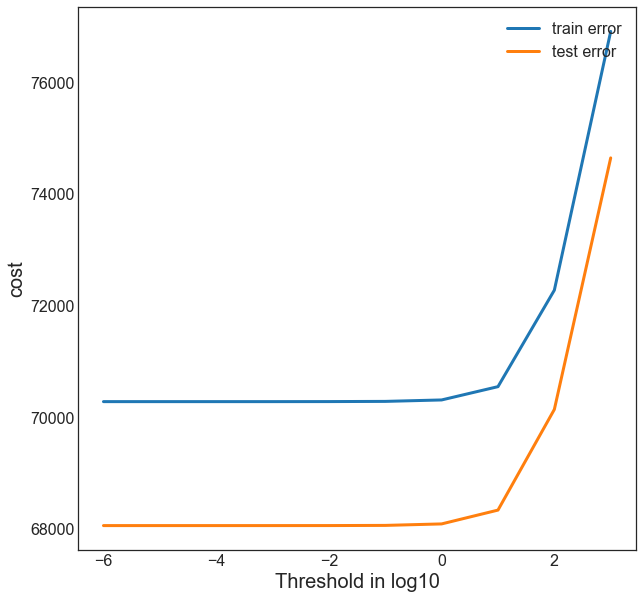

In [99]:
plt.plot(np.log10(Thresholds), costth_train,label="train error")
plt.plot(np.log10(Thresholds), costth_test,label="test error")
plt.legend(loc="upper right")
plt.xlabel("Threshold in log10")
plt.ylabel("cost")

Text(0, 0.5, 'cost')

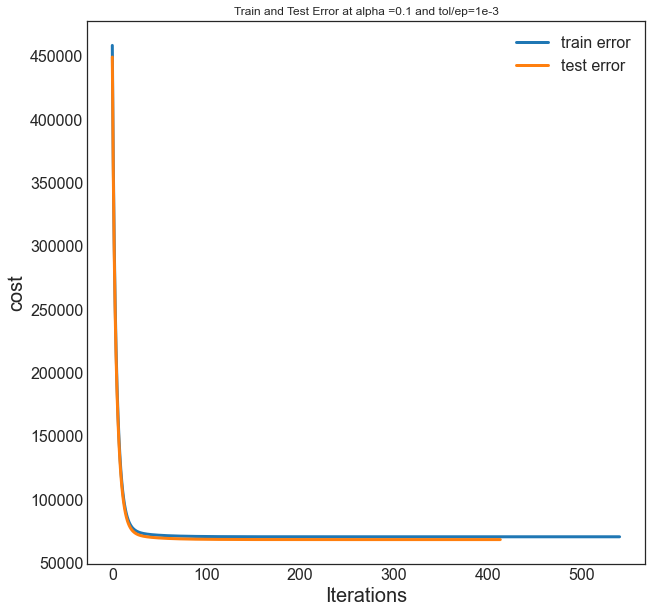

In [100]:
plt.plot(cost_list171,label="train error")
plt.plot(cost_list172,label="test error")
plt.legend(loc="upper right")
plt.title("Train and Test Error at alpha =0.1 and tol/ep=1e-3")
plt.xlabel("Iterations")
plt.ylabel("cost")

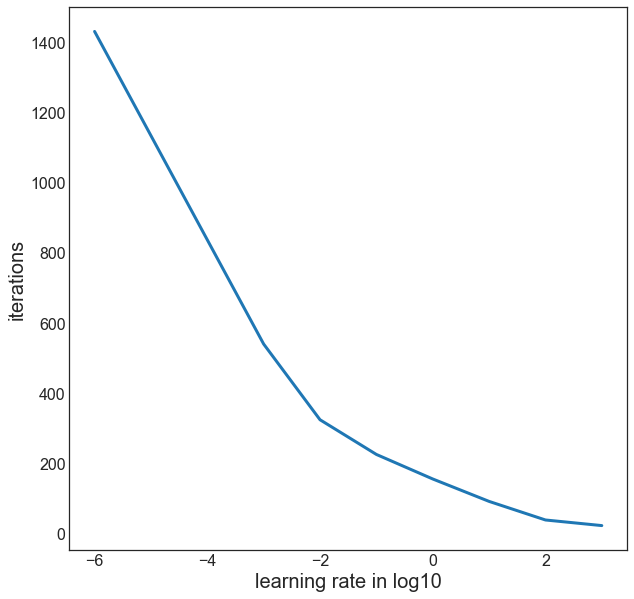

In [101]:
plt.plot(np.log10(Thresholds),iterats)
plt.xlabel("learning rate in log10")
plt.ylabel("iterations")
plt.show()

In [102]:
bikedataorig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Experiment 3

In [105]:
bikedataexp3 = bikedataorig.sample(n=9,axis='columns')

In [106]:
bikedataexp3.head()

,Holiday,Snowfall (cm),Date,Seasons,Functioning Day,Hour,Rainfall(mm),Dew point temperature(°C),Rented Bike Count
0,No Holiday,0.0,01/12/17,Winter,Yes,0,0.0,-17.6,254
1,No Holiday,0.0,01/12/17,Winter,Yes,1,0.0,-17.6,204
2,No Holiday,0.0,01/12/17,Winter,Yes,2,0.0,-17.7,173
3,No Holiday,0.0,01/12/17,Winter,Yes,3,0.0,-17.6,107
4,No Holiday,0.0,01/12/17,Winter,Yes,4,0.0,-18.6,78


In [107]:
bikedataexp3.isnull().sum()

Holiday                      0
Snowfall (cm)                0
Date                         0
Seasons                      0
Functioning Day              0
Hour                         0
Rainfall(mm)                 0
Dew point temperature(°C)    0
Rented Bike Count            0
dtype: int64

In [108]:
print(bikedataexp3.shape)
print(bikedataexp3.size)

(8760, 9)
78840


In [109]:
replaceStruct = {
                "Functioning Day": {"No": 0, "Yes": 1},
                "Holiday":{"No Holiday":0,"Holiday":1}
                    }
oneHotCols=["Seasons","Hour"]

In [110]:
bikedataexp3=bikedataexp3.replace(replaceStruct)
bikedataexp3=pd.get_dummies(bikedataexp3, columns=oneHotCols)

In [111]:
bikedataexp3['Date']=pd.to_datetime(bikedataexp3['Date'])
bikedataexp3['Year']=bikedataexp3['Date'].dt.year
bikedataexp3['Month']=bikedataexp3['Date'].dt.month
bikedataexp3['Day']=bikedataexp3['Date'].dt.day
bikedataexp3['WeekDay']=bikedataexp3['Date'].dt.day_name()
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
bikedataexp3['WeekDayEncoding']=bikedataexp3['WeekDay'].map(mapping_dictDay)

In [112]:
bikedataexp3.head()

,Holiday,Snowfall (cm),Date,Functioning Day,Rainfall(mm),Dew point temperature(°C),Rented Bike Count,Seasons_Autumn,Seasons_Spring,Seasons_Summer,...,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23,Year,Month,Day,WeekDay,WeekDayEncoding
0,0,0.0,2017-01-12,1,0.0,-17.6,254,0,0,0,...,0,0,0,0,0,2017,1,12,Thursday,4
1,0,0.0,2017-01-12,1,0.0,-17.6,204,0,0,0,...,0,0,0,0,0,2017,1,12,Thursday,4
2,0,0.0,2017-01-12,1,0.0,-17.7,173,0,0,0,...,0,0,0,0,0,2017,1,12,Thursday,4
3,0,0.0,2017-01-12,1,0.0,-17.6,107,0,0,0,...,0,0,0,0,0,2017,1,12,Thursday,4
4,0,0.0,2017-01-12,1,0.0,-18.6,78,0,0,0,...,0,0,0,0,0,2017,1,12,Thursday,4


In [113]:
bikedataexp3=bikedataexp3.drop('Date',axis=1)
bikedataexp3=bikedataexp3.drop('WeekDay',axis=1)
bikedataexp3=bikedataexp3.drop('Seasons_Autumn',axis=1)


bikedataexp3=bikedataexp3.drop('Hour_0',axis=1)

In [114]:
bikedataexp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Holiday                    8760 non-null   int64  
 1   Snowfall (cm)              8760 non-null   float64
 2   Functioning Day            8760 non-null   int64  
 3   Rainfall(mm)               8760 non-null   float64
 4   Dew point temperature(°C)  8760 non-null   float64
 5   Rented Bike Count          8760 non-null   int64  
 6   Seasons_Spring             8760 non-null   uint8  
 7   Seasons_Summer             8760 non-null   uint8  
 8   Seasons_Winter             8760 non-null   uint8  
 9   Hour_1                     8760 non-null   uint8  
 10  Hour_2                     8760 non-null   uint8  
 11  Hour_3                     8760 non-null   uint8  
 12  Hour_4                     8760 non-null   uint8  
 13  Hour_5                     8760 non-null   uint8

In [115]:
bikedataexp3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Holiday                    8760 non-null   int64  
 1   Snowfall (cm)              8760 non-null   float64
 2   Functioning Day            8760 non-null   int64  
 3   Rainfall(mm)               8760 non-null   float64
 4   Dew point temperature(°C)  8760 non-null   float64
 5   Rented Bike Count          8760 non-null   int64  
 6   Seasons_Spring             8760 non-null   uint8  
 7   Seasons_Summer             8760 non-null   uint8  
 8   Seasons_Winter             8760 non-null   uint8  
 9   Hour_1                     8760 non-null   uint8  
 10  Hour_2                     8760 non-null   uint8  
 11  Hour_3                     8760 non-null   uint8  
 12  Hour_4                     8760 non-null   uint8  
 13  Hour_5                     8760 non-null   uint8

In [116]:
Xexp3 = bikedataexp3.drop("Rented Bike Count", axis=1)
yexp3 = bikedataexp3['Rented Bike Count']

In [117]:
from sklearn.model_selection import train_test_split

X_trainexp3, X_testexp3, y_trainexp3, y_testexp3 = train_test_split(Xexp3, yexp3, test_size=.30, random_state=42)

In [118]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrainexp3_transform=sc.fit_transform(X_trainexp3)

In [119]:
Xtestexp3_transform=sc.fit_transform(X_testexp3)

In [120]:
regression_modelexp3 = LinearRegression()
regression_modelexp3.fit(Xtrainexp3_transform, y_trainexp3)
print(regression_modelexp3.intercept_, regression_modelexp3.coef_)
print("Train Score:",regression_modelexp3.score(Xtrainexp3_transform, y_trainexp3))
print("Test Score:",regression_modelexp3.score(Xtestexp3_transform, y_testexp3))
print('Variance score: %.3f' % regression_modelexp3.score(Xtestexp3_transform, y_testexp3)) # Also the r^2
y_predexp3=regression_modelexp3.predict(Xtestexp3_transform)
print('R^2: %.3f' % r2_score(y_testexp3, y_predexp3))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_testexp3, y_predexp3))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_testexp3, y_predexp3))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_testexp3, y_predexp3)))

706.6350293542038 [ -18.10266351  -29.32454335  166.68876729 -116.03475898   34.45476275
  -85.74567309   35.1486518  -293.94734106  -22.39238885  -49.52945654
  -64.76235145  -79.8151244   -79.68180901  -49.66495164   11.69916233
   85.55810998   27.02522767   -0.38974755   14.15415417   36.54672906
   39.86639837   45.10738661   58.40266744   82.52515436  120.33987253
  195.30570991  136.55162743  110.3563592   100.48616418   74.43070191
   25.75330759  -21.98020824  -18.44067171    0.31655426   -9.3752968 ]
Train Score: 0.5929126177905875
Test Score: 0.5816469243241578
Variance score: 0.582
R^2: 0.582
Mean Absolute Error: 310.564
Mean Squared Error: 171436.951
Root Mean Squared Error: 414.049


In [121]:
betaexp3,coefexp3,cost_listexp3,epoch_listexp3=batch_gradient_descent(Xtrainexp3_transform,y_trainexp3,100000,0.01,1e-3)
print(betaexp3,coefexp3)
print("Train Error:",cost_listexp3[-1])

Converged, iterations:  7310 85206.78569080129 85206.78469083736 85206.78569080129 85206.78469083736 0.0009999639296438545 !!!
[ -18.10150739  -29.30795896  166.70275056 -116.02127011   34.36042045
  -85.78518683   35.1658307  -294.05664179  -23.95279447  -51.09808565
  -66.31407985  -81.39742348  -81.24848266  -51.2404669    10.13232043
   83.99268738   25.4212915    -1.96480377   12.56178266   34.9318769
   38.27186617   43.53046249   56.80860805   80.92820133  118.80947143
  193.71580859  134.94945613  108.79806667   98.91950965   72.89731261
   24.17836391  -22.03261713  -18.48107092    0.29649711   -9.37491597] 706.6350293541983
Train Error: 85206.78469083736


In [122]:
betaexp33,coefexp33,cost_listexp33,epoch_listexp33=batch_gradient_descent(Xtestexp3_transform,y_testexp3,100000,0.01,1e-3)
print(betaexp33,coefexp33)
print("Test Error:",cost_listexp33[-1])

Converged, iterations:  6613 83391.28077288634 83391.27977325949 83391.28077288634 83391.27977325949 0.0009996268490795046 !!!
[  -6.33635794  -16.53708889  148.06318321  -97.83437082   53.65976578
  -66.82668057   20.00084774 -286.91032578  -30.7392802   -46.90450493
  -73.6858495   -87.00164362  -87.11362213  -52.47359833   15.85008498
  117.74674734   17.50714413   -6.83958646    9.65357841   23.45566088
   40.5938686    35.17749009   53.3596511    58.58323794  111.90670652
  192.13749759  110.19407717   98.6981959    94.25110342   72.39883602
   19.73092533  -22.89871673  -19.98099239   10.64527587  -20.87102007] 699.858447488579
Test Error: 83391.27977325949


Text(0, 0.5, 'cost')

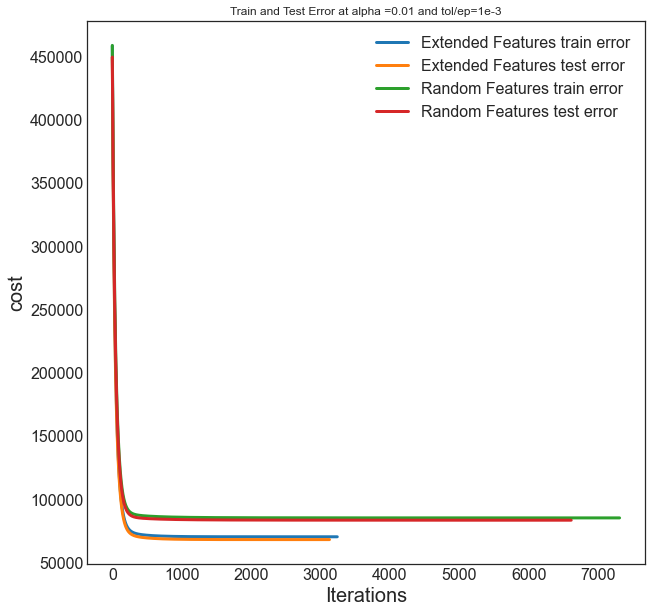

In [123]:
plt.plot(cost_list2,label="Extended Features train error")
plt.plot(cost_list22,label="Extended Features test error")
plt.plot(cost_listexp3,label="Random Features train error")
plt.plot(cost_listexp33,label="Random Features test error")
plt.legend(loc="upper right")
plt.title("Train and Test Error at alpha =0.01 and tol/ep=1e-3")
plt.xlabel("Iterations")
plt.ylabel("cost")

## Experiment 4

In [124]:
bikedataorig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [125]:
colsexp4=["Rented Bike Count","Temperature(°C)","Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)","Functioning Day","Seasons","Hour","Holiday"]
#Randomly selected based on even count

In [126]:
bikedataexp4=bikedataorig[colsexp4]

In [127]:
bikedataexp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Solar Radiation (MJ/m2)  8760 non-null   float64
 3   Rainfall(mm)             8760 non-null   float64
 4   Snowfall (cm)            8760 non-null   float64
 5   Functioning Day          8760 non-null   object 
 6   Seasons                  8760 non-null   object 
 7   Hour                     8760 non-null   int64  
 8   Holiday                  8760 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 616.1+ KB


In [128]:
bikedataexp4.head()

,Rented Bike Count,Temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Seasons,Hour,Holiday
0,254,-5.2,0.0,0.0,0.0,Yes,Winter,0,No Holiday
1,204,-5.5,0.0,0.0,0.0,Yes,Winter,1,No Holiday
2,173,-6.0,0.0,0.0,0.0,Yes,Winter,2,No Holiday
3,107,-6.2,0.0,0.0,0.0,Yes,Winter,3,No Holiday
4,78,-6.0,0.0,0.0,0.0,Yes,Winter,4,No Holiday


In [129]:
bikedataexp4.isnull().sum()


Rented Bike Count          0
Temperature(°C)            0
Solar Radiation (MJ/m2)    0
Rainfall(mm)               0
Snowfall (cm)              0
Functioning Day            0
Seasons                    0
Hour                       0
Holiday                    0
dtype: int64

In [130]:
print(bikedataexp4.shape)
print(bikedataexp4.size)

(8760, 9)
78840


In [131]:
bikedataexp4["Holiday"].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [132]:
replaceStruct = {
                "Functioning Day": {"No": 0, "Yes": 1},
                "Holiday":{"No Holiday":0,"Holiday":1}
                    }
oneHotCols=["Seasons","Hour"]

In [133]:
bikedataexp4=bikedataexp4.replace(replaceStruct)
bikedataexp4=pd.get_dummies(bikedataexp4, columns=oneHotCols)
bikedataexp4.head(10)

,Rented Bike Count,Temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,254,-5.2,0.00,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,0.00,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,0.00,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,0.00,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,0.00,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,100,-6.4,0.00,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,181,-6.6,0.00,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,460,-7.4,0.00,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,930,-7.6,0.01,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,490,-6.5,0.23,0.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
bikedataexp4=bikedataexp4.drop('Hour_0',axis=1)
bikedataexp4=bikedataexp4.drop('Seasons_Autumn',axis=1)

In [135]:
bikedataexp4.head()

,Rented Bike Count,Temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Holiday,Seasons_Spring,Seasons_Summer,Seasons_Winter,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,254,-5.2,0.0,0.0,0.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,0.0,0.0,0.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,0.0,0.0,0.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,0.0,0.0,0.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,0.0,0.0,0.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [136]:
bikedataexp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Solar Radiation (MJ/m2)  8760 non-null   float64
 3   Rainfall(mm)             8760 non-null   float64
 4   Snowfall (cm)            8760 non-null   float64
 5   Functioning Day          8760 non-null   int64  
 6   Holiday                  8760 non-null   int64  
 7   Seasons_Spring           8760 non-null   uint8  
 8   Seasons_Summer           8760 non-null   uint8  
 9   Seasons_Winter           8760 non-null   uint8  
 10  Hour_1                   8760 non-null   uint8  
 11  Hour_2                   8760 non-null   uint8  
 12  Hour_3                   8760 non-null   uint8  
 13  Hour_4                   8760 non-null   uint8  
 14  Hour_5                  

In [137]:
Xexp4 = bikedataexp4.drop("Rented Bike Count", axis=1)
yexp4 = bikedataexp4['Rented Bike Count']

In [138]:
from sklearn.model_selection import train_test_split

X_trainexp4, X_testexp4, y_trainexp4, y_testexp4 = train_test_split(Xexp4, yexp4, test_size=.30, random_state=42)

In [139]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrainexp4_transform=sc.fit_transform(X_trainexp4)

In [140]:
Xtestexp4_transform=sc.fit_transform(X_testexp4)

In [141]:
regression_modelexp4 = LinearRegression()
regression_modelexp4.fit(Xtrainexp4_transform, y_trainexp4)
print(regression_modelexp4.intercept_, regression_modelexp4.coef_)
print("Train Score:",regression_modelexp4.score(Xtrainexp4_transform, y_trainexp4))
print("Test Score:",regression_modelexp4.score(Xtestexp4_transform, y_testexp4))
print('Variance score: %.3f' % regression_modelexp4.score(Xtestexp4_transform, y_testexp4)) # Also the r^2
y_predexp4=regression_modelexp4.predict(Xtestexp4_transform)
print('R^2: %.3f' % r2_score(y_testexp4, y_predexp4))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_testexp4, y_predexp4))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_testexp4, y_predexp4))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_testexp4, y_predexp4)))

706.6350293542074 [ 222.22128962  156.06168305  -95.33484317  -11.83246021  175.4562054
  -26.33806921  -84.97255986  -68.70704736 -150.6609887   -20.62006827
  -46.73387059  -60.40846672  -73.90365844  -73.25110881  -44.04808301
   14.14302918   77.43745971   -1.44530642  -50.25085181  -53.93560437
  -48.57199324  -45.80947272  -41.99144364  -19.30917589   17.40830671
   74.17330537  165.49044601  122.48548076  103.00734896   97.06420487
   71.50923593   25.59545185]
Train Score: 0.6408596189906027
Test Score: 0.6323981991040135
Variance score: 0.632
R^2: 0.632
Mean Absolute Error: 290.749
Mean Squared Error: 150639.581
Root Mean Squared Error: 388.123


In [142]:
betaexp4,coefexp4,cost_listexp4,epoch_listexp4=batch_gradient_descent(Xtrainexp4_transform,y_trainexp4,100000,0.01,1e-3)
print(betaexp4,coefexp4)
print("Train Error:",cost_listexp4[-1])

Converged, iterations:  2917 75170.44666279409 75170.4456654545 75170.44666279409 75170.4456654545 0.00099733957904391 !!!
[ 220.66395545  155.87763895  -95.3975065   -11.8776983   175.38766859
  -26.23976452  -84.98713877  -67.85644918 -151.68204765  -21.17665492
  -47.29922185  -60.98374554  -74.5037828   -73.84946793  -44.64416594
   13.55166327   76.87723219   -1.95109858  -50.67629571  -54.29825637
  -48.87488189  -46.10385591  -42.25357812  -19.59363872   17.09297148
   73.83871228  165.0852082   122.01163814  102.51768814   96.54460563
   71.00330569   25.04772899] 706.6350293540777
Train Error: 75170.4456654545


In [143]:
betaexp44,coefexp44,cost_listexp44,epoch_listexp44=batch_gradient_descent(Xtestexp4_transform,y_testexp4,100000,0.01,1e-3)
print(betaexp44,coefexp44)
print("Test Error:",cost_listexp44[-1])

Converged, iterations:  3175 73271.30107929689 73271.30008084793 73271.30107929689 73271.30008084793 0.0009984489588532597 !!!
[ 242.92405346  144.13039233  -80.13548926   -3.49218519  155.29098629
  -14.51331484  -65.03475347  -80.59426606 -138.81414719  -27.00284595
  -43.09431921  -69.62561341  -83.26570647  -80.33113591  -42.94130867
   21.147826    108.92738681  -10.4671134   -56.05970535  -57.06444879
  -44.76026295  -46.13702138  -40.68222382  -20.98389372   -1.18377911
   65.14925886  164.79701292   91.90588385   88.70911697   85.42363891
   70.72906154   17.38894405] 699.8584474885741
Test Error: 73271.30008084793


Text(0, 0.5, 'cost')

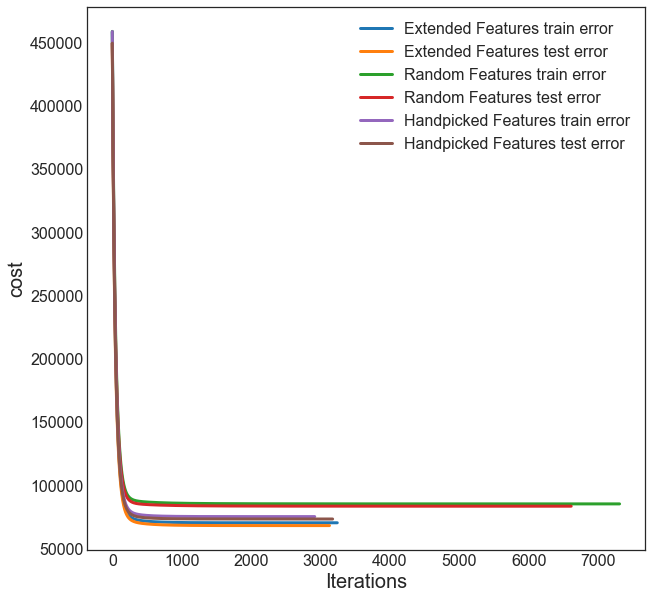

In [144]:
plt.plot(cost_list2,label="Extended Features train error")
plt.plot(cost_list22,label="Extended Features test error")
plt.plot(cost_listexp3,label="Random Features train error")
plt.plot(cost_listexp33,label="Random Features test error")
plt.plot(cost_listexp4,label="Handpicked Features train error")
plt.plot(cost_listexp44,label="Handpicked Features test error")
plt.legend(loc="upper right")
#plt.title("Train and Test Error at alpha =0.1 and tol/ep=1.0")
plt.xlabel("Iterations")
plt.ylabel("cost")

In [145]:
importance = regression_model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 268.75284
Feature: 1, Score: -133.00282
Feature: 2, Score: 1.42285
Feature: 3, Score: 3.36254
Feature: 4, Score: 67.79880
Feature: 5, Score: -72.27642
Feature: 6, Score: 7.14032
Feature: 7, Score: -29.28816
Feature: 8, Score: 174.88747
Feature: 9, Score: -28.98563
Feature: 10, Score: -0.67108
Feature: 11, Score: -12.76943
Feature: 12, Score: -11.91813
Feature: 13, Score: -77.56646
Feature: 14, Score: -65.48692
Feature: 15, Score: -177.93937
Feature: 16, Score: -18.75166
Feature: 17, Score: -42.83584
Feature: 18, Score: -56.10654
Feature: 19, Score: -68.88963
Feature: 20, Score: -67.11869
Feature: 21, Score: -36.78967
Feature: 22, Score: 23.26004
Feature: 23, Score: 87.08516
Feature: 24, Score: 6.73320
Feature: 25, Score: -41.57320
Feature: 26, Score: -43.89511
Feature: 27, Score: -39.30318
Feature: 28, Score: -36.70870
Feature: 29, Score: -37.71603
Feature: 30, Score: -20.56667
Feature: 31, Score: 10.41851
Feature: 32, Score: 63.55630
Feature: 33, Score: 151.95506
Fe

In [146]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Temperature(°C)          8760 non-null   float64
 2   Humidity(%)              8760 non-null   int64  
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   int64  
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall                 8760 non-null   float64
 7   Snowfall                 8760 non-null   float64
 8   Holiday                  8760 non-null   int64  
 9   FunctioningDay           8760 non-null   int64  
 10  Year                     8760 non-null   int64  
 11  Month                    8760 non-null   int64  
 12  Day                      8760 non-null   int64  
 13  WeekDayEncoding          8760 non-null   int64  
 14  Seasons_Spring          

## To Resolve the functional form of Errors

In [147]:
bikedataexp5=bikedata

In [148]:
bikedataexp5.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall,Snowfall,Holiday,FunctioningDay,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [149]:
Xexp5 = bikedataexp5.drop("Rented Bike Count", axis=1)
yexp5 = np.sqrt(bikedataexp5['Rented Bike Count'])
#Applying square root to the target variable inorder to make errors homoskadastic or linear

In [150]:
from sklearn.model_selection import train_test_split

X_trainexp5, X_testexp5, y_trainexp5, y_testexp5 = train_test_split(Xexp5, yexp5, test_size=.30, random_state=42)

In [151]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrainexp5_transform=sc.fit_transform(X_trainexp5)

In [152]:
Xtestexp5_transform=sc.fit_transform(X_testexp5)

In [153]:
regression_modelexp5 = LinearRegression()
regression_modelexp5.fit(Xtrainexp5_transform, y_trainexp5)
print(regression_modelexp5.intercept_, regression_modelexp5.coef_)
print("Train Score:",regression_modelexp5.score(Xtrainexp5_transform, y_trainexp5))
print("Test Score:",regression_modelexp5.score(Xtestexp5_transform, y_testexp5))
print('Variance score: %.3f' % regression_modelexp5.score(Xtestexp5_transform, y_testexp5)) # Also the r^2
y_predexp5=regression_modelexp5.predict(Xtestexp5_transform)
print('R^2: %.3f' % r2_score(y_testexp5, y_predexp5))
print('Mean Absolute Error: %.3f' % metrics.mean_absolute_error(y_testexp5, y_predexp5))
print('Mean Squared Error: %.3f' % metrics.mean_squared_error(y_testexp5, y_predexp5))
print('Root Mean Squared Error: %.3f' % np.sqrt(metrics.mean_squared_error(y_testexp5, y_predexp5)))

23.45855181442666 [ 4.91282921e+00 -2.82860409e+00 -1.30373042e-01  1.72015496e-02
  1.14241690e+00 -1.92892309e+00 -8.22748015e-02 -6.88613293e-01
  5.25520516e+00 -7.09518265e-01 -1.31469738e-03 -1.16567014e-01
 -2.31543590e-01 -1.57560477e+00 -1.21904233e+00 -3.97675275e+00
 -3.82508726e-01 -9.90430370e-01 -1.45447080e+00 -1.93916224e+00
 -1.86993915e+00 -9.62154670e-01  3.27060227e-01  1.37061514e+00
  1.89258554e-01 -7.27848261e-01 -7.57184076e-01 -6.79629143e-01
 -6.45502083e-01 -6.83861267e-01 -4.06951288e-01  3.72984186e-02
  8.40142521e-01  2.07096834e+00  1.50462609e+00  1.31486186e+00
  1.33199349e+00  1.03695601e+00  3.48286601e-01]
Train Score: 0.7557650656533645
Test Score: 0.7412020572627219
Variance score: 0.741
R^2: 0.741
Mean Absolute Error: 4.715
Mean Squared Error: 39.317
Root Mean Squared Error: 6.270


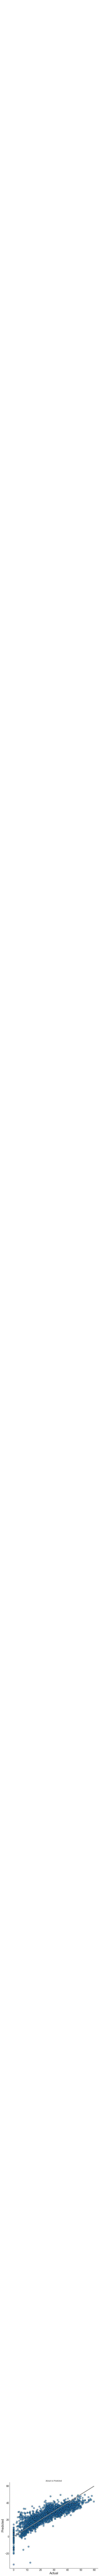

In [154]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=10,10 
#plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
g = sns.scatterplot(x=y_testexp5,
                y=y_predexp5,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(y_test),max(y_testexp5)],
             y=[min(y_testexp5),max(y_testexp5)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(regression_model.score(Xtestexp5_transform,y_testexp5)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(metrics.mean_squared_error(y_testexp5,y_predexp5,squared=False))),
             xy=(0,3000),
             size='medium')
sns.despine()

In [155]:
betaexp5,coefexp5,cost_listexp5,epoch_listexp5=batch_gradient_descent(Xtrainexp5_transform,y_trainexp5,100000,0.01,1e-3)
print(betaexp5,coefexp5)
print("Train Error:",cost_listexp5[-1])

Converged, iterations:  873 19.597294532197537 19.59629709101611 19.597294532197537 19.59629709101611 0.0009974411814290818 !!!
[ 4.64915527 -2.2204176  -0.32330805  0.43228916  1.16598242 -1.99749246
 -0.17140977 -0.63546431  5.07331047 -0.18172037  0.45213741  0.1049253
 -0.21775768 -0.81230234 -0.61646479 -3.04236757  0.3063195  -0.31319563
 -0.79194289 -1.26274507 -1.21977296 -0.30261986  0.98385158  2.06147745
  0.9481951   0.06327932  0.08023844  0.19359354  0.22652536  0.19908045
  0.4843818   0.93676144  1.67908789  2.90556465  2.31870487  2.07416301
  2.07174348  1.74979432  1.06481531] 23.454958780845644
Train Error: 19.59629709101611


In [156]:
betaexp55,coefexp55,cost_listexp55,epoch_listexp55=batch_gradient_descent(Xtestexp5_transform,y_testexp5,100000,0.01,1e-3)
print(betaexp55,coefexp55)
print("Test Error:",cost_listexp55[-1])

Converged, iterations:  923 19.596077689876573 19.595079634283376 19.596077689876573 19.595079634283376 0.0009980555931967672 !!!
[ 4.9819393  -2.29628749 -0.33340598  0.38390793  0.92891257 -1.60771157
 -0.03811495 -0.49121048  4.688453   -0.30808275  0.26500641  0.1271144
 -0.37903722 -0.6880648  -0.84404237 -3.10048317  0.08728451 -0.28823921
 -0.89553302 -1.3441154  -1.25795788 -0.22978423  1.09344597  2.49108538
  0.65856591 -0.06384223 -0.0292989   0.18603837  0.15391616  0.18996419
  0.41307907  0.64441129  1.59260657  2.6691479   1.83439584  1.86168671
  1.86790053  1.72630403  0.93769197] 23.405858451285173
Test Error: 19.595079634283376


## The End of Code
### Refer the Document for analysis and interpretations